In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv("movie.csv", sep = ",")
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df['genres'] = df['genres'].str.split('|')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


In [5]:
# Create a new DataFrame where each row corresponds to a movie-genre pair
movies_genres_df = df.explode('genres')

# Perform data analysis based on genres
genre_counts = movies_genres_df['genres'].value_counts()
genre_counts

Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
Name: genres, dtype: int64

In [6]:
movies_genres_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [7]:
df.shape, movies_genres_df.shape

((27278, 3), (54406, 3))

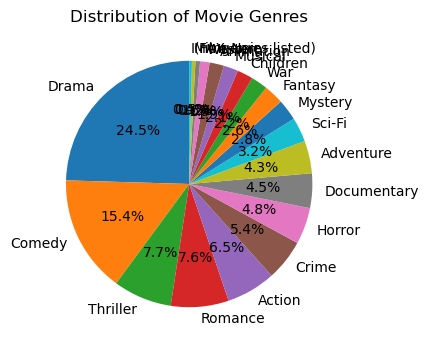

In [8]:
# Count the occurrences of each label
label_counts = movies_genres_df['genres'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movie Genres')
plt.show()

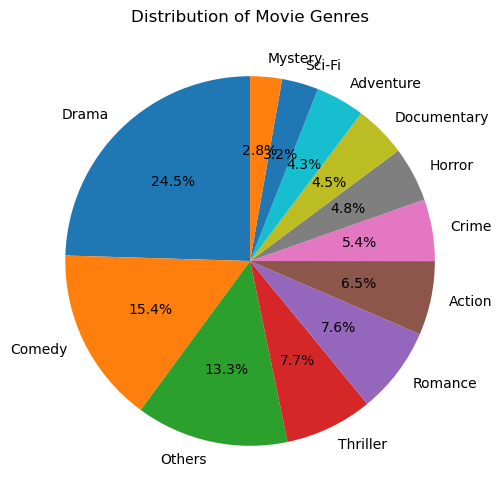

In [18]:
# Count the occurrences of each label
label_counts = movies_genres_df['genres'].value_counts()

# Identify labels with less than 3% occurrence
threshold = 0.027
labels_to_group = label_counts[label_counts / len(movies_genres_df) < threshold].index

# Group labels less than 3% into 'Others'
movies_genres_df['genres_grouped'] = movies_genres_df['genres'].apply(lambda x: x if x not in labels_to_group else 'Others')
grouped_label_counts = movies_genres_df['genres_grouped'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(grouped_label_counts, labels=grouped_label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movie Genres')
plt.show()

In [ ]:
# Define the emotion-genre mapping
emotion_genre_mapping = {
    'Angry': ['Family', 'Drama', 'Romance', 'Travel'],
    'Disgust': ['Musical', 'Fantasy', 'History'],
    'Fear': ['Musical', 'Fantasy', 'Action', 'Sports'],
    'Happy': ['Action', 'Thriller', 'Sci-Fi'],
    'Sad': ['Drama', 'Romance', 'Comedy'],
    'Surprise': ['Thriller', 'Mystery', 'Adventure', 'Horror']
}

# Create a new column 'emotion' and map it based on genres
movies_genres_df['emotion'] = movies_genres_df['genres'].apply(lambda x: next((emotion for emotion, genres in emotion_genre_mapping.items() if any(genre in x for genre in genres)), None))

# Display the resulting DataFrame
movies_genres_df.head()

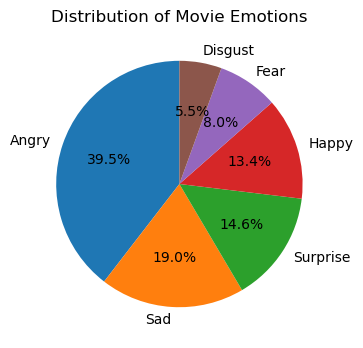

In [18]:
# Count the occurrences of each label
label_counts = movies_genres_df['emotion'].value_counts()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movie Emotions')
plt.show()

In [19]:
movies_genres_df.head(20)

,movieId,title,genres,emotion
0,1,Toy Story (1995),Adventure,Surprise
0,1,Toy Story (1995),Animation,None
0,1,Toy Story (1995),Children,None
0,1,Toy Story (1995),Comedy,Sad
0,1,Toy Story (1995),Fantasy,Disgust
1,2,Jumanji (1995),Adventure,Surprise
1,2,Jumanji (1995),Children,None
1,2,Jumanji (1995),Fantasy,Disgust
2,3,Grumpier Old Men (1995),Comedy,Sad
2,3,Grumpier Old Men (1995),Romance,Angry


In [20]:
none_emotion = movies_genres_df.loc[movies_genres_df['emotion'].isna()]
none_emotion.genres.value_counts()

Crime                 2939
Documentary           2471
War                   1194
Children              1139
Animation             1027
Western                676
Film-Noir              330
(no genres listed)     246
IMAX                   196
Name: genres, dtype: int64